In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\lENOVO\OneDrive\Desktop\Udemy Machine Learning\Projects\Credit Cards\Credit card transactions - India - Simple.csv")

In [3]:
data.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [5]:
data.shape

(26052, 7)

In [6]:
data.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [7]:
data.drop(['index'],axis=1,inplace = True)

In [8]:
data[['City1', 'Country']] = data['City'].str.split(',', expand=True)

In [9]:
data.drop(['City','Country'],axis=1,inplace=True)

In [10]:
data.rename(columns={'City1':'City'})

,Date,Card Type,Exp Type,Gender,Amount,City
0,29-Oct-14,Gold,Bills,F,82475,Delhi
1,22-Aug-14,Platinum,Bills,F,32555,Greater Mumbai
2,27-Aug-14,Silver,Bills,F,101738,Bengaluru
3,12-Apr-14,Signature,Bills,F,123424,Greater Mumbai
4,5-May-15,Gold,Bills,F,171574,Bengaluru
...,...,...,...,...,...,...
26047,22-Jun-14,Silver,Travel,F,128191,Kolkata
26048,3-Aug-14,Signature,Travel,M,246316,Pune
26049,16-Jan-15,Silver,Travel,M,265019,Hyderabad
26050,14-Sep-14,Silver,Travel,M,88174,Kanpur


In [11]:
data['Date'] = pd.to_datetime(data['Date'])

data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [12]:
data

,Date,Card Type,Exp Type,Gender,Amount,City1,day,month,year
0,2014-10-29,Gold,Bills,F,82475,Delhi,29,10,2014
1,2014-08-22,Platinum,Bills,F,32555,Greater Mumbai,22,8,2014
2,2014-08-27,Silver,Bills,F,101738,Bengaluru,27,8,2014
3,2014-04-12,Signature,Bills,F,123424,Greater Mumbai,12,4,2014
4,2015-05-05,Gold,Bills,F,171574,Bengaluru,5,5,2015
...,...,...,...,...,...,...,...,...,...
26047,2014-06-22,Silver,Travel,F,128191,Kolkata,22,6,2014
26048,2014-08-03,Signature,Travel,M,246316,Pune,3,8,2014
26049,2015-01-16,Silver,Travel,M,265019,Hyderabad,16,1,2015
26050,2014-09-14,Silver,Travel,M,88174,Kanpur,14,9,2014


In [13]:
data.drop(['Date','day'],axis=1,inplace=True)

# EDA

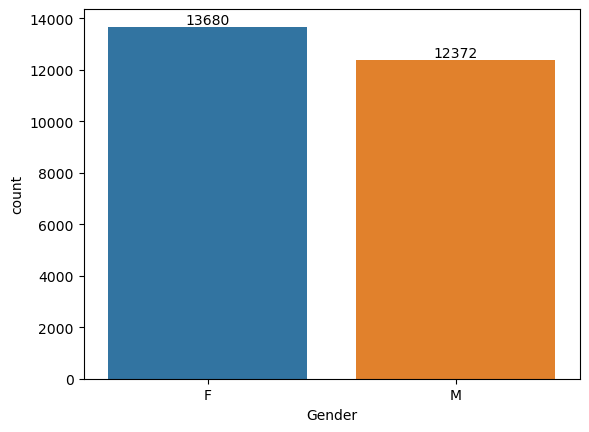

In [14]:
ax = sns.countplot(x='Gender',data=data)

for bars in ax.containers:
    ax.bar_label(bars)

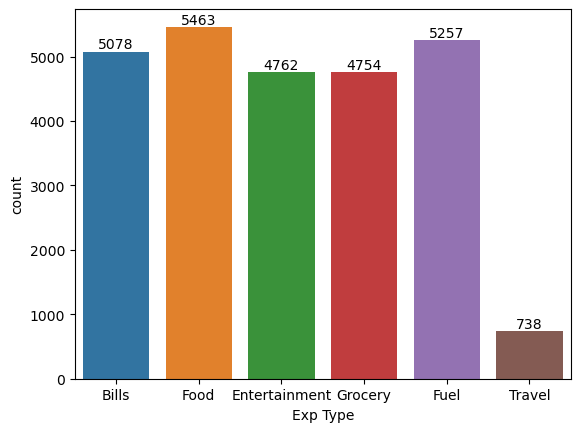

In [15]:
ax = sns.countplot(x='Exp Type',data=data)

for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
# cards_total = data.groupby('Exp Type')['Amount'].sum().sort_values(by='Amount',ascending=True)
cards_total = data.groupby(['Exp Type','Gender'])['Amount'].sum().sort_values(ascending=False).reset_index()
cards_total = cards_total.sort_values(by='Amount', ascending=False)
cards_total

,Exp Type,Gender,Amount
0,Bills,F,580035469
1,Food,F,452817279
2,Fuel,M,396853400
3,Fuel,F,392282421
4,Food,M,371906730
5,Entertainment,M,367774203
6,Grocery,F,365646998
7,Entertainment,F,358663333
8,Grocery,M,352560925
9,Bills,M,327037004


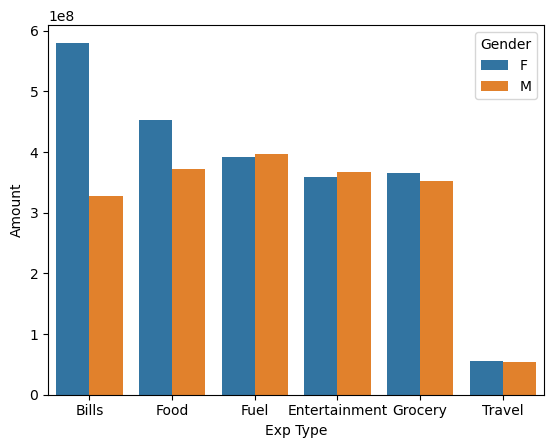

In [17]:
ax = sns.barplot(x='Exp Type',y='Amount',data=cards_total,hue='Gender')

In [18]:
card_type_and_city = data.groupby(['City1'])['Amount'].sum().sort_values(ascending=False).reset_index().head(8)
card_type_and_city

,City1,Amount
0,Greater Mumbai,576751476
1,Bengaluru,572326739
2,Ahmedabad,567794310
3,Delhi,556929212
4,Kolkata,115466943
5,Lucknow,115334476
6,Chennai,114730600
7,Hyderabad,114493477


<Axes: xlabel='City1', ylabel='Amount'>

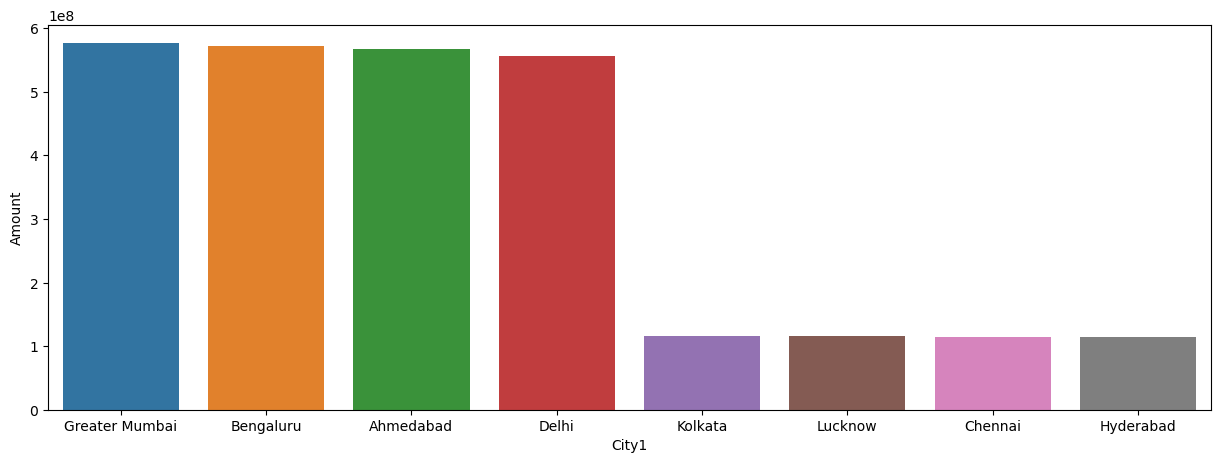

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x='City1',y='Amount',data=card_type_and_city)

In [20]:
year_sales = data.groupby(['year'])['Amount'].sum().sort_values(ascending=False).reset_index()
year_sales

,year,Amount
0,2014,2454714033
1,2015,1006475456
2,2013,613643884


<Axes: xlabel='year', ylabel='Amount'>

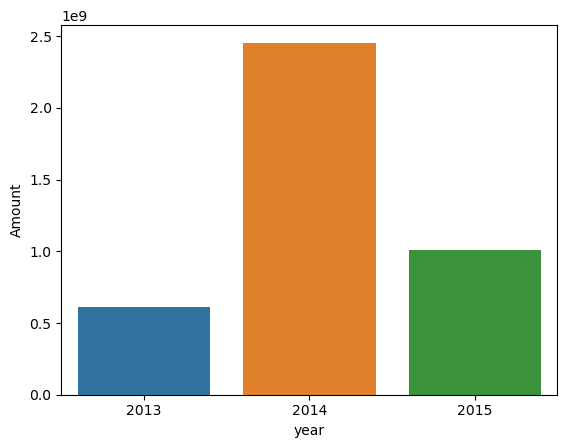

In [21]:
sns.barplot(x='year',y='Amount',data=year_sales)

In [22]:
month_sales = data.groupby(['month'])['Amount'].sum().sort_values(ascending=False).reset_index()
month_sales

,month,Amount
0,1,431209556
1,10,419846007
2,12,416935415
3,4,416394734
4,3,410054446
5,11,404107968
6,2,383512624
7,5,375455609
8,8,218453126
9,9,209561433


<Axes: xlabel='month', ylabel='Amount'>

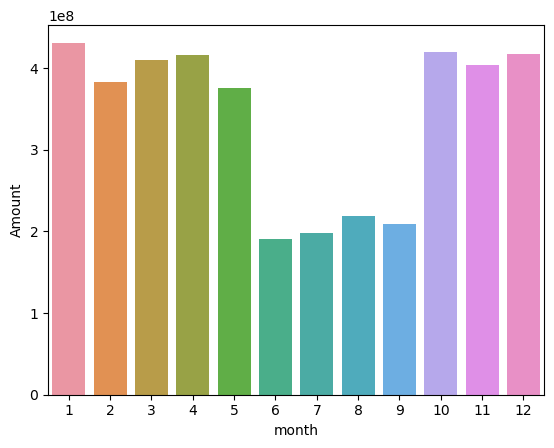

In [23]:
sns.barplot(x='month',y='Amount',data=month_sales)